In [4]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [22]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [6]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

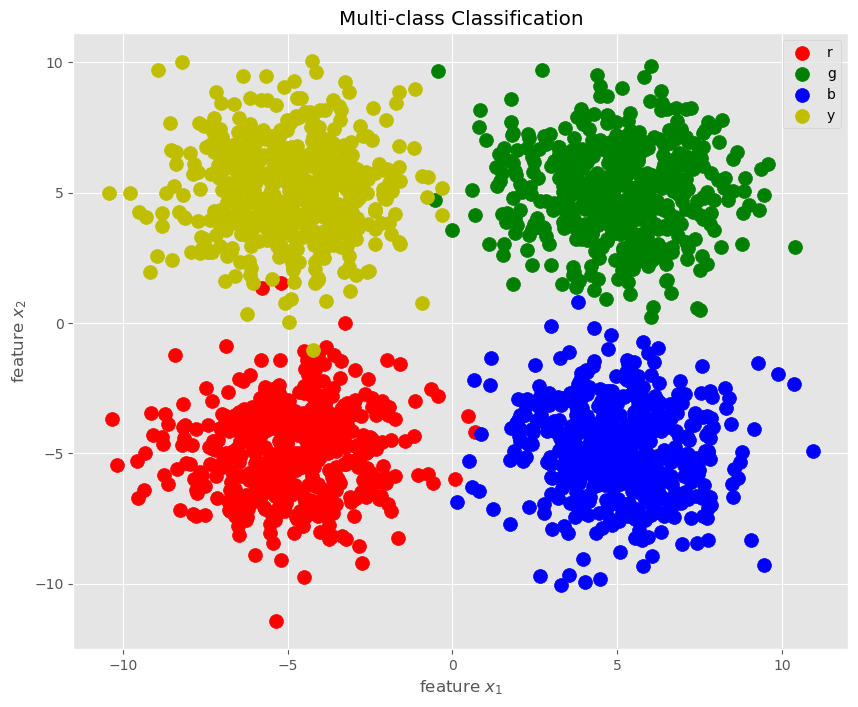

In [7]:
cp = 5
nclasses = 2
mean1 = [-cp, -cp]
mean2 = [cp, cp]
mean3 = [cp, -cp]
mean4 = [-cp, cp]
cov = [[3.0, 0.0], [0.0, 3.0]]

# Create some points for the training set...
nexamples = 2000
x1 = np.random.multivariate_normal(mean1, cov, nexamples // 4)
x2 = np.random.multivariate_normal(mean2, cov, nexamples // 4)
x3 = np.random.multivariate_normal(mean3, cov, nexamples // 4)
x4 = np.random.multivariate_normal(mean4, cov, nexamples // 4)

X = np.vstack((x1, x2, x3, x4))
Y = np.vstack((1 * np.ones((nexamples // 4, 1)),
               2 * np.ones((nexamples // 4, 1)),
               3 * np.ones((nexamples // 4, 1)),
               4 * np.ones((nexamples // 4, 1))))

# Plot the points
plt.scatter(x1[:, 0], x1[:, 1], c='r', s=100)
plt.scatter(x2[:, 0], x2[:, 1], c='g', s=100)
plt.scatter(x3[:, 0], x3[:, 1], c='b', s=100)
plt.scatter(x4[:, 0], x4[:, 1], c='y', s=100)

plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r', 'g', 'b', 'y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg', format='svg')

# Create some points for the testing set
ntexamples = 1000
x1 = np.random.multivariate_normal(mean1, cov, ntexamples // 4)
x2 = np.random.multivariate_normal(mean2, cov, ntexamples // 4)
x3 = np.random.multivariate_normal(mean3, cov, ntexamples // 4)
x4 = np.random.multivariate_normal(mean4, cov, ntexamples // 4)

Xt = np.vstack((x1, x2, x3, x4))
Yt = np.vstack((1 * np.ones((ntexamples // 4, 1)),
                2 * np.ones((ntexamples // 4, 1)),
                3 * np.ones((ntexamples // 4, 1)),
                4 * np.ones((ntexamples // 4, 1))))


In [8]:
import randomForest as rf

In [9]:
rfc=rf.RandomForest(weaklearner='Conic')

In [10]:
print( X.shape, Y.shape)

(2000, 2) (2000, 1)


In [11]:
%pdb
rfc.train(X,Y)

Automatic pdb calling has been turned ON


In [12]:
len(rfc.trees)

10

In [13]:
%pdb
# Training Confusion Matrix...
Yp=rfc.predict(X)
print( Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned OFF
(2000, 1) 2000


C:\Users\user\Desktop\Files\University\ML\Assignment\A4\randomForest.py:179: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_predictions = mode(predictions, axis=0).mode[0]


Predicted,1,All
Actual,,
1.0,500,500
2.0,500,500
3.0,500,500
4.0,500,500
All,2000,2000


In [14]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

C:\Users\user\Desktop\Files\University\ML\Assignment\A4\randomForest.py:179: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_predictions = mode(predictions, axis=0).mode[0]
C:\Users\user\Desktop\Files\University\ML\Assignment\A4\tools.py:699: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


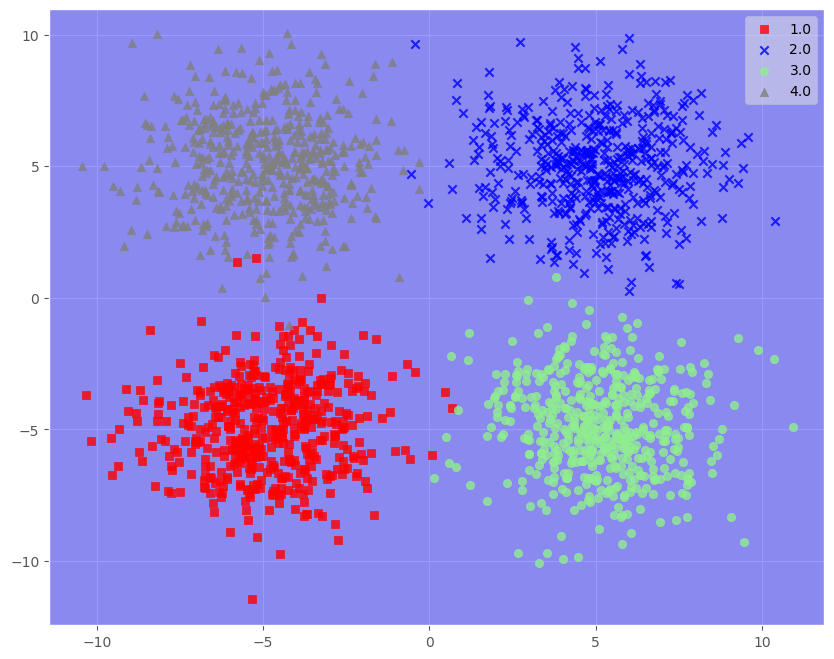

In [16]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [15]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


C:\Users\user\Desktop\Files\University\ML\Assignment\A4\randomForest.py:179: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_predictions = mode(predictions, axis=0).mode[0]


Predicted,1,All
Actual,,
1.0,250,250
2.0,250,250
3.0,250,250
4.0,250,250
All,1000,1000


In [16]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

C:\Users\user\Desktop\Files\University\ML\Assignment\A4\randomForest.py:179: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_predictions = mode(predictions, axis=0).mode[0]
C:\Users\user\Desktop\Files\University\ML\Assignment\A4\tools.py:699: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


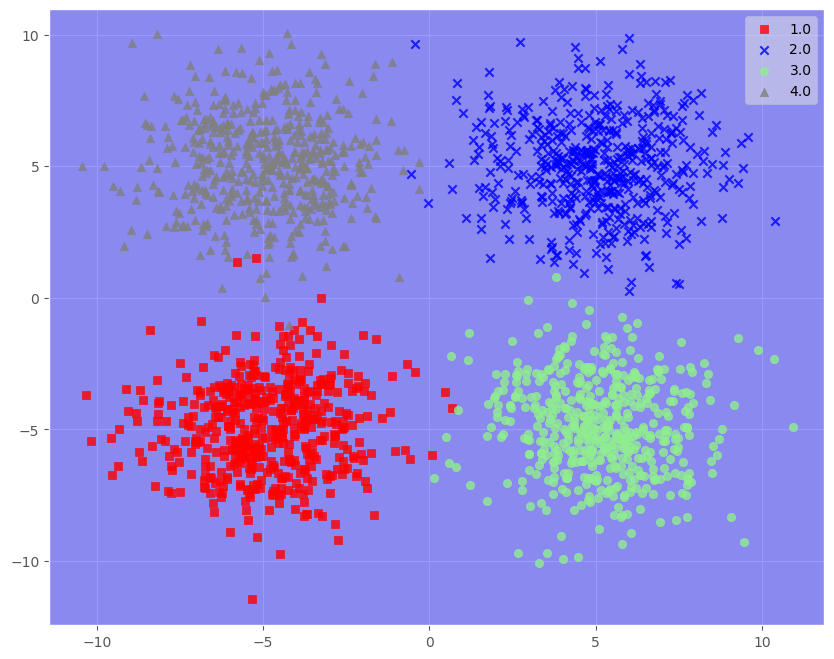

In [17]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

In [18]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
import tools as t

In [20]:
# t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

In [ ]:
%pdb
ntrees=rfc.ntrees
nrows=ntrees/2 + 1
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout()

## Lets Run on Nonlinear Data, The Spherical Examples...

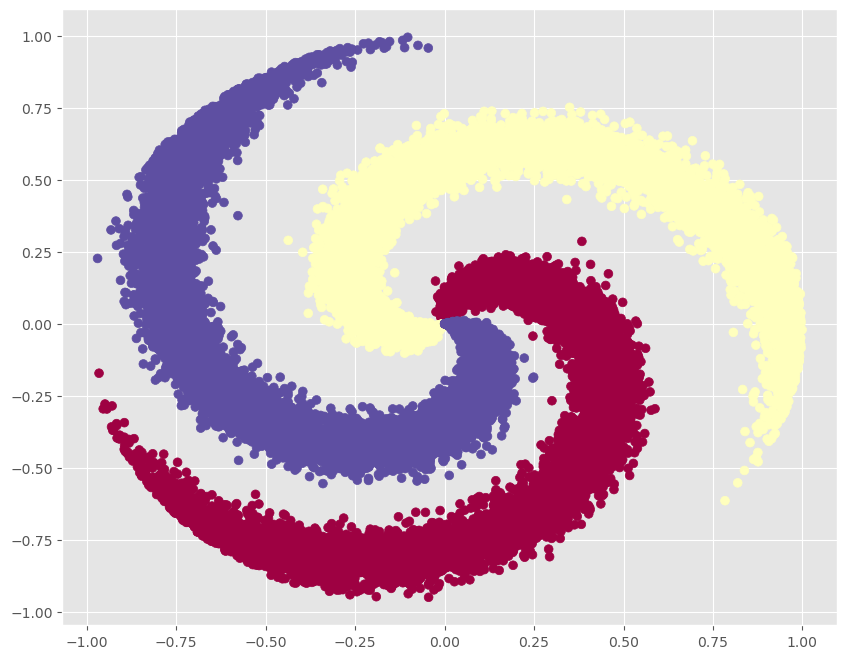

In [23]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

In [25]:
print( X.shape, Y.shape)

(30000, 2) (30000,)


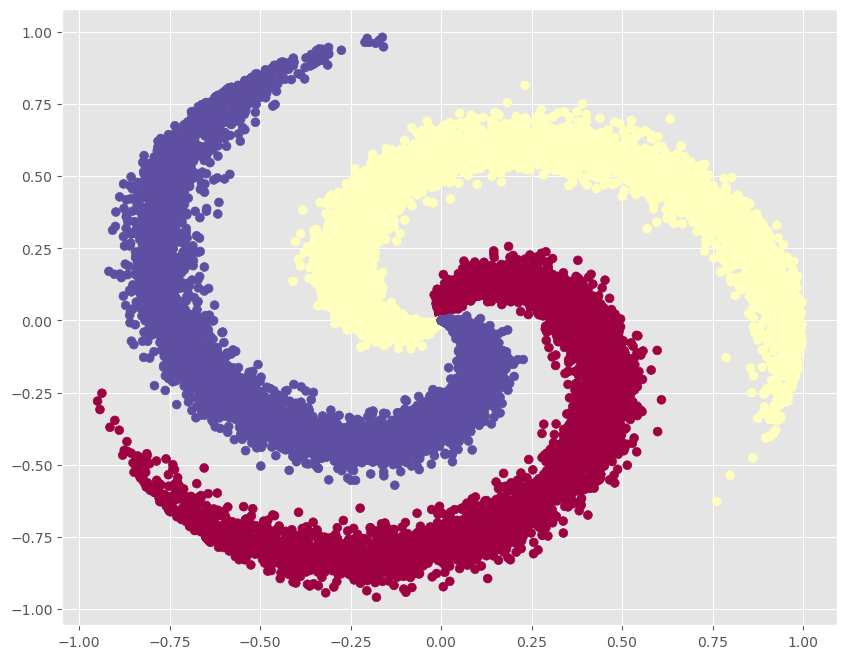

In [26]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [27]:
rfc=rf.RandomForest(weaklearner='Conic',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

In [29]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print( Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0,All
Actual,,
0,10000,10000
1,10000,10000
2,10000,10000
All,30000,30000


In [31]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

C:\Users\user\Desktop\Files\University\ML\Assignment\A4\randomForest.py:179: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_predictions = mode(predictions, axis=0).mode[0]


(30000,) 15000


Predicted,0,All
Actual,,
0,5000,5000
1,5000,5000
2,5000,5000
All,15000,15000


In [34]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

In [ ]:
t.plot_points_range(rfc,X,Y)

C:\Users\user\Desktop\Files\University\ML\Assignment\A4\tools.py:699: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


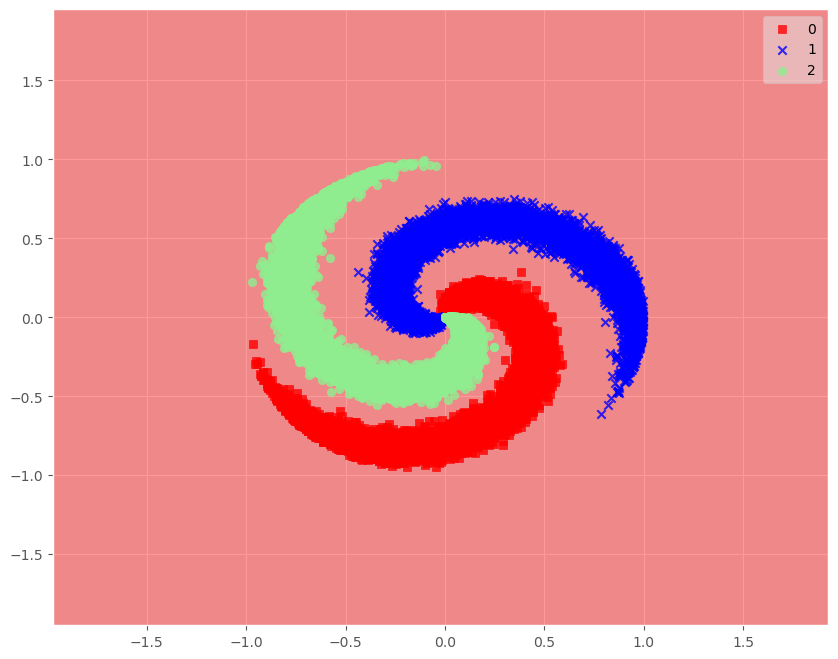

In [36]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

###Lets Plot Per-Tree Decision Boundary

In [ ]:
%pdb
ntrees=rfc.ntrees
nrows=ntrees/2 + 1
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...